In [2]:
import numpy as np 
import pandas as pd 
#pd.set_option('display.max_rows', None) #Makes pandas show all the rows. Setting to 'None' means 'all'
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train_data = pd.read_csv("C:/Users/chizu/OneDrive/Desktop/Bootcamp/week 6/train.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Starting data exploration


train_data.isnull() #Boolean values. True meaning that there is no value and False meaning there is a value.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

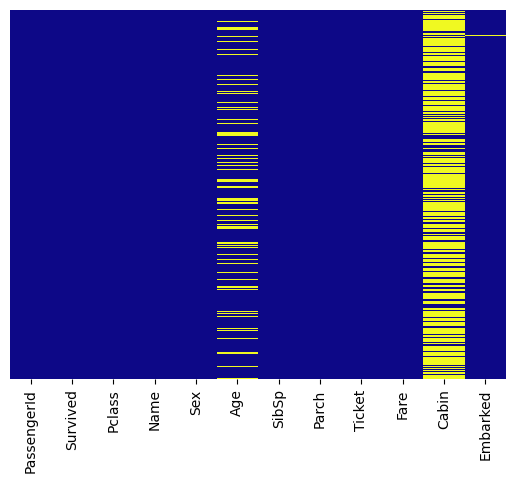

In [6]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='plasma')

#Every yellow bar on the heat map is a "true point" which represents a missing value.

<AxesSubplot: xlabel='Survived', ylabel='count'>

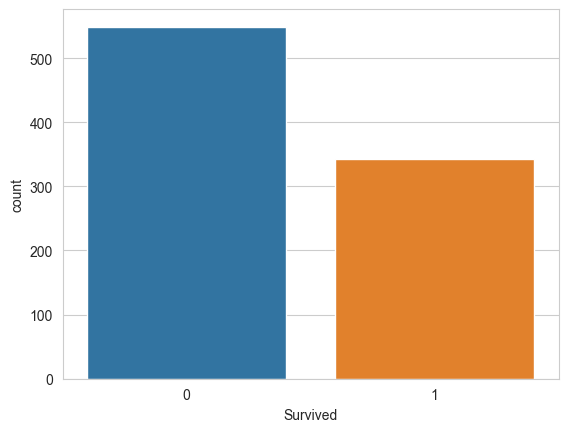

In [7]:
#Countplot of those who died VS those who survived.
sns.set_style('whitegrid')
sns.countplot(x='Survived',  data=train_data)


<AxesSubplot: xlabel='Survived', ylabel='count'>

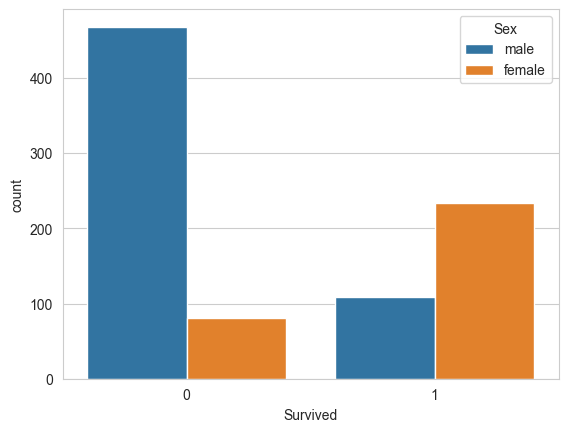

In [8]:
#Grouping those who died and those who survived as male and female.
sns.countplot(x='Survived', hue='Sex', data=train_data)

#It is clear that far more men died than women.

<AxesSubplot: xlabel='Survived', ylabel='count'>

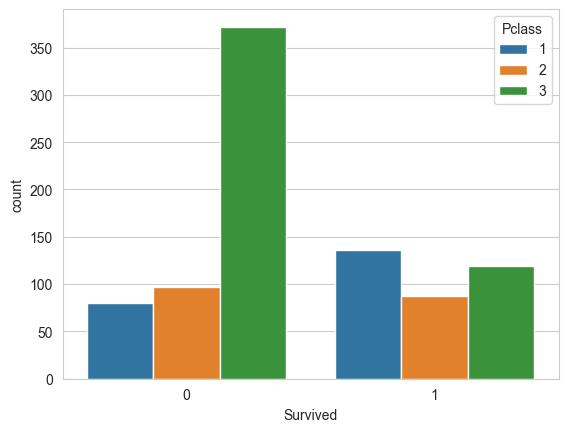

In [9]:
#Grouping those who died and those who survived by class.
sns.countplot(x='Survived', hue='Pclass', data=train_data)

#The 3rd class has by far the highest deaths and those in the 1st class have slightly more survivors that those in 3rd class.
#The Least survivors are in the 2nd class.

<AxesSubplot: xlabel='Age', ylabel='Count'>

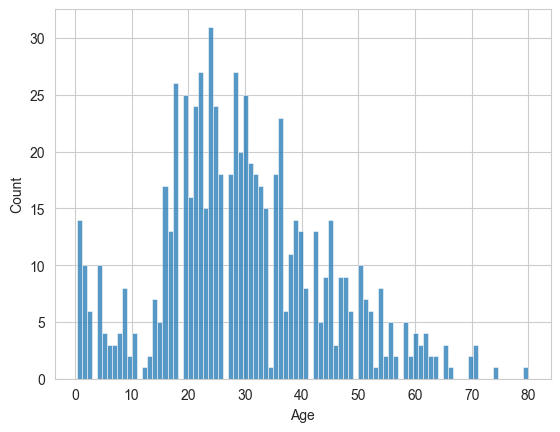

In [10]:
#Histogram of the passangers on the Titanic distributed by age.
sns.histplot(train_data['Age'].dropna(), kde=False, bins=90)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0, 0.5, 'Passenger Count')

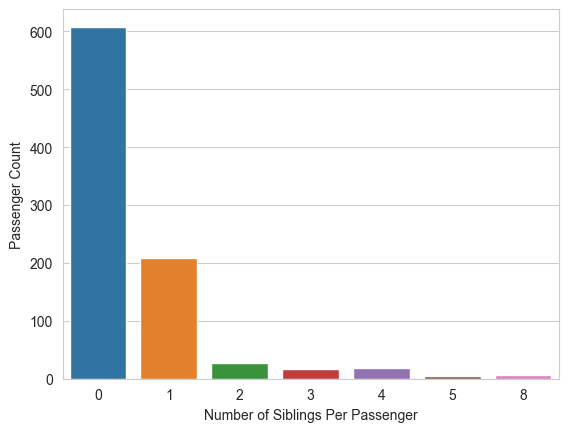

In [12]:
sns.countplot(x='SibSp', data=train_data )
plt.xlabel("Number of Siblings Per Passenger")
plt.ylabel("Passenger Count")
#Passengers grouped by the number of siblings that they have. 
#Clearly, most passengers did not have siblings.

Text(0, 0.5, 'Passenger Count')

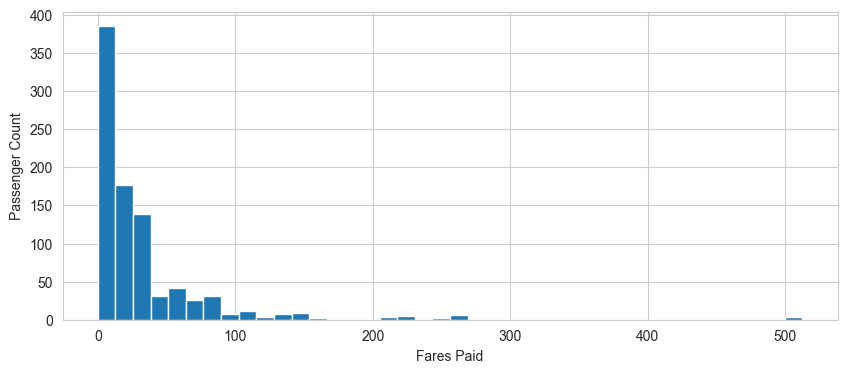

In [13]:
train_data['Fare'].hist(bins=40, figsize=(10, 4))
plt.xlabel("Fares Paid")
plt.ylabel("Passenger Count")
#Passengers grouped accorded to the fares that they paid.
#Most passengers clearly paid less than 50.

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

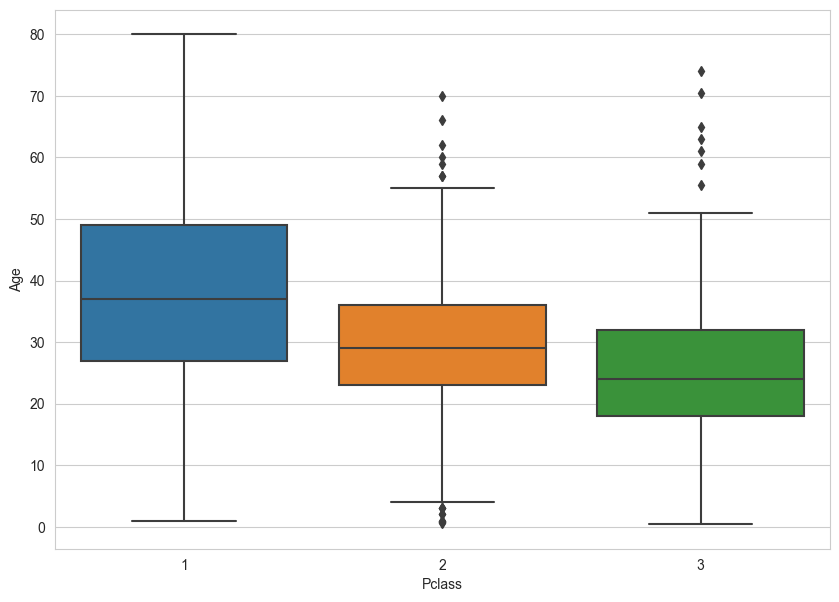

In [14]:
#Boxplot of age VS pclass.
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=train_data)

#People in the 1st class are older than other classes.

In [16]:
#Fixing the missing age data by taking the mean age by passenger class to replace the missing age data.
def sort_by_age(cell):
    Age = cell[0]
    Pclass = cell[1]

    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        if Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(sort_by_age, axis=1)

<AxesSubplot: >

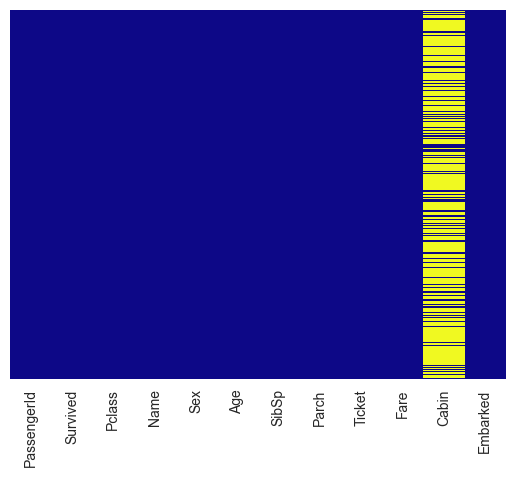

In [18]:
#Missing data has been removed from the age column according to the heatmap.
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [110]:
#Too much missing data in the Cabin column and so this column has to be dropped.
train_data.drop('Cabin', axis=1, inplace=True)

In [111]:
train_data.head() #Cabin column has been removed.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot: >

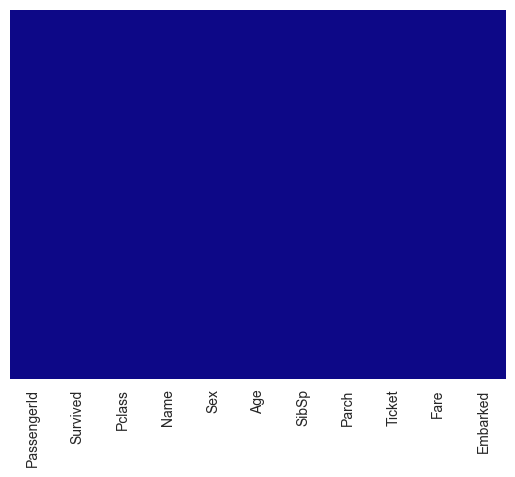

In [112]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='plasma')#No missing values left.

In [113]:
#Data cleaning has been done.
#Now to preprocess the data. I'm going to convert the categorical features into a dummy variable for the algorithm to understand.
#So...

pd.get_dummies(train_data['Sex'])


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [114]:
#Dropping the female column because the male is already an indicator of males and females with 1 meaning male and 0 meaning female.
sex = pd.get_dummies(train_data['Sex'], drop_first=True)

In [115]:
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      1
24      0
25      0
26      1
27      1
28      0
29      1
30      1
31      0
32      0
33      1
34      1
35      1
36      1
37      1
38      0
39      0
40      0
41      0
42      1
43      0
44      0
45      1
46      1
47      0
48      1
49      0
50      1
51      1
52      0
53      0
54      1
55      1
56      0
57      1
58      0
59      1
60      1
61      0
62      1
63      1
64      1
65      1
66      0
67      1
68      0
69      1
70      1
71      0
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      0
80      1
81      1
82      0
83      1
84      0
85      0
86      1
87      1
88      0
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      0


In [116]:
embark = pd.get_dummies(train_data['Embarked'], drop_first=True)

In [117]:
print(embark)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
5    1  0
6    0  1
7    0  1
8    0  1
9    0  0
10   0  1
11   0  1
12   0  1
13   0  1
14   0  1
15   0  1
16   1  0
17   0  1
18   0  1
19   0  0
20   0  1
21   0  1
22   1  0
23   0  1
24   0  1
25   0  1
26   0  0
27   0  1
28   1  0
29   0  1
30   0  0
31   0  0
32   1  0
33   0  1
34   0  0
35   0  1
36   0  0
37   0  1
38   0  1
39   0  0
40   0  1
41   0  1
42   0  0
43   0  0
44   1  0
45   0  1
46   1  0
47   1  0
48   0  0
49   0  1
50   0  1
51   0  1
52   0  0
53   0  1
54   0  0
55   0  1
56   0  1
57   0  0
58   0  1
59   0  1
60   0  0
61   0  0
62   0  1
63   0  1
64   0  0
65   0  0
66   0  1
67   0  1
68   0  1
69   0  1
70   0  1
71   0  1
72   0  1
73   0  0
74   0  1
75   0  1
76   0  1
77   0  1
78   0  1
79   0  1
80   0  1
81   0  1
82   1  0
83   0  1
84   0  1
85   0  1
86   0  1
87   0  1
88   0  1
89   0  1
90   0  1
91   0  1
92   0  1
93   0  1
94   0  1
95   0  1
96   0  0
97   0  0
98   0  1


In [118]:
#Concating the new columns to the data
train_data = pd.concat([train_data, sex, embark], axis=1)

In [119]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [120]:
#Dropping more columns that are not needed.
train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis =1, inplace=True)

In [121]:
train_data.head()# All the data is now numerical and can be used in the algorithm.

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [122]:
#Treating the train.csv as the whole data set and doing a train_test_split.
x = train_data.drop('Survived', axis = 1)
#y is the target variable.
y = train_data['Survived']

In [123]:
from sklearn.model_selection import train_test_split


In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [125]:
#Training the model and doing predictions.
from sklearn.linear_model import LogisticRegression

In [127]:
logic_model = LogisticRegression()
logic_model.fit(x_train, y_train)

C:\Users\chizu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1]:
#Predicting x_test
pred_logic =logic_model.predict(x_test)

NameError: name 'logic_model' is not defined

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test, pred_logic))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

